In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835045 entries, 221769 to 466206
Data columns (total 69 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             835045 non-null  float64
 1    Flow Duration                835045 non-null  float64
 2    Total Fwd Packets            835045 non-null  float64
 3    Total Backward Packets       835045 non-null  float64
 4   Total Length of Fwd Packets   835045 non-null  float64
 5    Total Length of Bwd Packets  835045 non-null  float64
 6    Fwd Packet Length Max        835045 non-null  float64
 7    Fwd Packet Length Min        835045 non-null  float64
 8    Fwd Packet Length Mean       835045 non-null  float64
 9    Fwd Packet Length Std        835045 non-null  float64
 10  Bwd Packet Length Max         835045 non-null  float64
 11   Bwd Packet Length Min        835045 non-null  float64
 12   Bwd Packet Length Mean       835045 no

In [8]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 835045 entries, 221769 to 466206
Series name: Label
Non-Null Count   Dtype
--------------   -----
835045 non-null  int64
dtypes: int64(1)
memory usage: 12.7 MB


In [9]:
em = []
arr = np.array(em)
arr1 = X_train.values.copy()
arr2 = y_train.values.copy()

arr3 = X_test.values.copy()
arr4 = y_test.values.copy()


In [10]:
arr1.resize(100000,78)
arr2.resize(100000,)
arr3.resize(10000,78)
arr4.resize(10000,)

X_train = pd.DataFrame(arr1)
y_train = pd.DataFrame(arr2)
X_test = pd.DataFrame(arr3)
y_test = pd.DataFrame(arr4)

In [12]:
model = KNeighborsClassifier(n_neighbors = 3)
model = model.fit(X_train, y_train.values.ravel())
model.score(X_test, y_test.values.ravel())

0.503

In [35]:
predicted = model.predict(X_test)
predicted

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predicted)
cf_matrix

array([[9708,   90],
       [ 109,   93]])

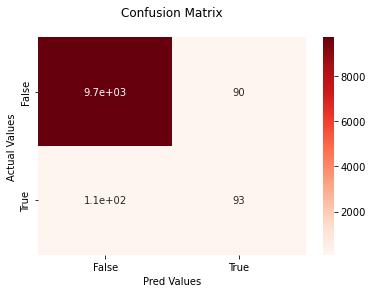

In [37]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds')
ax.set_title('Confusion Matrix\n');
ax.set_xlabel('Pred Values')
ax.set_ylabel('Actual Values');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()